Neural Network Classification

# Load the IMDB Dataset

In [27]:
import numpy as np
from tensorflow.keras.datasets import imdb

Now split the data into train and test

In [28]:
(train_data, train_labels,), (test_data, test_label) = imdb.load_data(
    num_words=10000)

In [29]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [30]:
train_labels[0]

1

In [31]:
len(train_labels)

25000

In [32]:
test_data[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [43]:
test_label[0]

0

In [34]:
max([max(sequence) for sequence in train_data])

9999

In [35]:
max([max(sequence) for sequence in test_data])

9999

As we have taken the IMDB reviews now decode those reviews back to text

In [36]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [37]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Data Preparation and Vectorizing the Sequences

In [38]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [45]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_label).astype("float32")

Building model

Model Definition

In [47]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compile the model

In [48]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Now validate the approach by setting aside a validation set

In [49]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now train the model

In [50]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6892 - loss: 0.5978 - val_accuracy: 0.8554 - val_loss: 0.4073
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8936 - loss: 0.3440 - val_accuracy: 0.8882 - val_loss: 0.3133
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9222 - loss: 0.2513 - val_accuracy: 0.8838 - val_loss: 0.2986
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9376 - loss: 0.1978 - val_accuracy: 0.8842 - val_loss: 0.2910
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9486 - loss: 0.1665 - val_accuracy: 0.8867 - val_loss: 0.2751
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9609 - loss: 0.1355 - val_accuracy: 0.8868 - val_loss: 0.2824
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9654 - loss: 0.1189 - val_accuracy: 0.8826 - val_loss: 0.2954
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9730 - loss: 0.1004 - val_accuracy: 0.8838 - v

In [51]:
history__dict = history.history
history__dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the training and validation loss

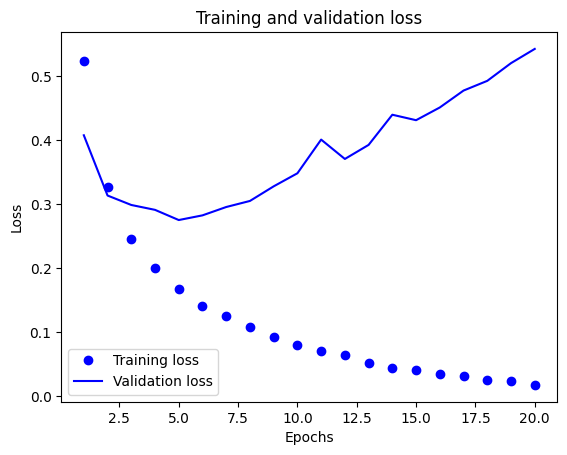

In [52]:
import matplotlib.pyplot as plt
history__dict = history.history
loss_values = history__dict["loss"]
val_loss_values = history__dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

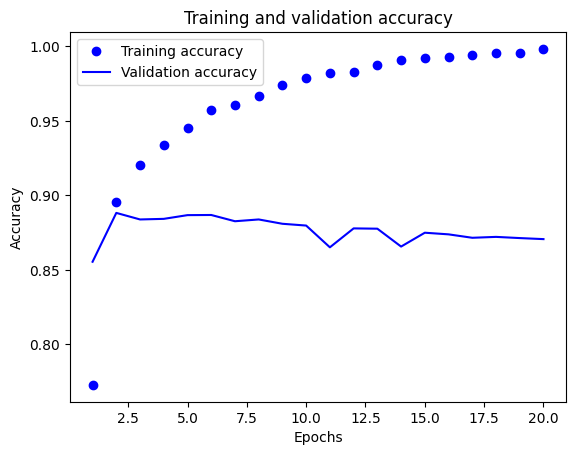

In [53]:
plt.clf()
acc = history__dict["accuracy"]
val_acc = history__dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Now Retraining the model from the scratch

In [54]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7369 - loss: 0.5731
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9014 - loss: 0.3062
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9191 - loss: 0.2301
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9362 - loss: 0.1858
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8831 - loss: 0.2874


In [55]:
results

[0.2845647633075714, 0.885919988155365]

Using a trained model to generate predictions on new data

In [56]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.26789585],
       [0.99977887],
       [0.9471912 ],
       ...,
       [0.14647947],
       [0.10771906],
       [0.72711045]], dtype=float32)

Build a neural network with 1 hidden layer

In [57]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7061 - loss: 0.6112 - val_accuracy: 0.8573 - val_loss: 0.4377
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8825 - loss: 0.3887 - val_accuracy: 0.8743 - val_loss: 0.3539
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9075 - loss: 0.3069 - val_accuracy: 0.8812 - val_loss: 0.3176
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9154 - loss: 0.2608 - val_accuracy: 0.8810 - val_loss: 0.3020
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9330 - loss: 0.2150 - val_accuracy: 0.8878 - val_loss: 0.2828
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9378 - loss: 0.1991 - val_accuracy: 0.8874 - val_loss: 0.2760
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9442 - loss: 0.1757 - val_accuracy: 0.8856 - val_loss: 0.2790
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9548 - loss: 0.1593 - val_accuracy: 0.8857 - v

In [58]:
history_dict = history1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the training validation loss

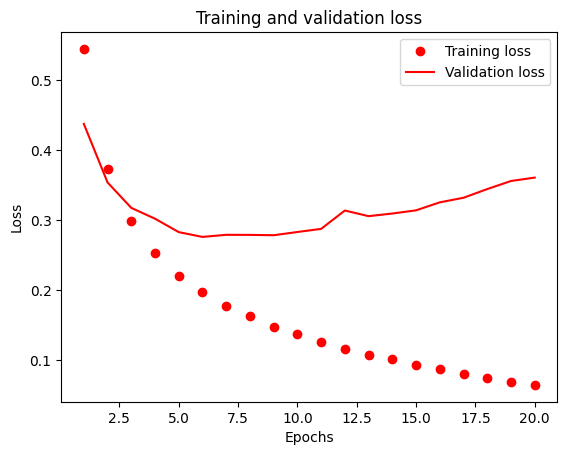

In [59]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

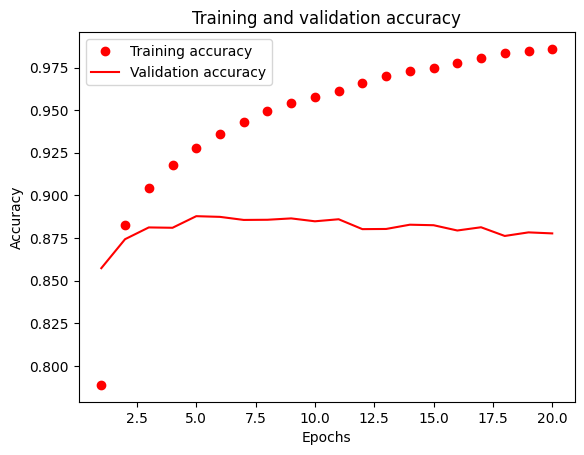

In [60]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retrain the model

In [61]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7567 - loss: 0.5341
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9012 - loss: 0.2967
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9261 - loss: 0.2291
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9320 - loss: 0.2006
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9397 - loss: 0.1769
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8861 - loss: 0.2822


In [62]:
results1

[0.28028222918510437, 0.8881199955940247]

In [63]:
model1.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.23480915],
       [0.9996522 ],
       [0.77750856],
       ...,
       [0.10955185],
       [0.08483315],
       [0.5361903 ]], dtype=float32)

Now create a neural netwok with 3 hidden layers

In [64]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6629 - loss: 0.6356 - val_accuracy: 0.8646 - val_loss: 0.4394
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8872 - loss: 0.3793 - val_accuracy: 0.8839 - val_loss: 0.3200
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9160 - loss: 0.2561 - val_accuracy: 0.8878 - val_loss: 0.2838
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9357 - loss: 0.1957 - val_accuracy: 0.8836 - val_loss: 0.2857
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9478 - loss: 0.1609 - val_accuracy: 0.8851 - val_loss: 0.2844
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9608 - loss: 0.1251 - val_accuracy: 0.8852 - val_loss: 0.2905
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9684 - loss: 0.1071 - val_accuracy: 0.8803 - val_loss: 0.3205
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9740 - loss: 0.0911 - val_accuracy: 0.8785 - v

In [65]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

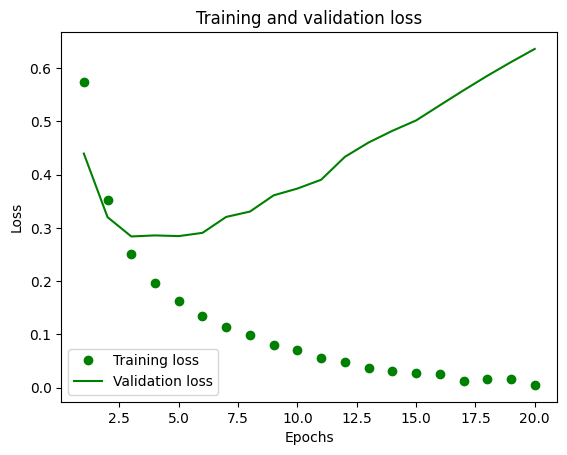

In [66]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

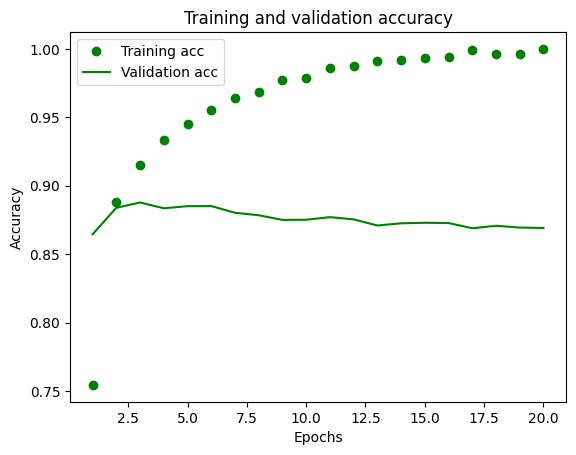

In [67]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [68]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(x_test, y_test)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7382 - loss: 0.5692
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9014 - loss: 0.2835
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9256 - loss: 0.2086
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8869 - loss: 0.2820


In [69]:
results_3

[0.2798955738544464, 0.8883600234985352]

In [70]:
model_3.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.22157127],
       [0.9990986 ],
       [0.9462215 ],
       ...,
       [0.13425602],
       [0.08877275],
       [0.73061824]], dtype=float32)

Build Neural network in 32 units

In [71]:
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6757 - loss: 0.6000 - val_accuracy: 0.8566 - val_loss: 0.3812
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8953 - loss: 0.3146 - val_accuracy: 0.8809 - val_loss: 0.3059
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9279 - loss: 0.2255 - val_accuracy: 0.8856 - val_loss: 0.2836
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9381 - loss: 0.1886 - val_accuracy: 0.8833 - val_loss: 0.2906
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9492 - loss: 0.1508 - val_accuracy: 0.8864 - val_loss: 0.2842
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9603 - loss: 0.1265 - val_accuracy: 0.8799 - val_loss: 0.3159
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9654 - loss: 0.1097 - val_accuracy: 0.8691 - val_loss: 0.3485
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9729 - loss: 0.0917 - val_accuracy: 0.8742 - v

In [72]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

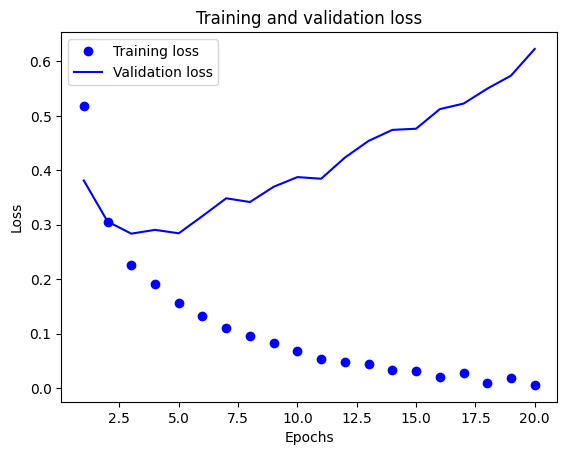

In [73]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

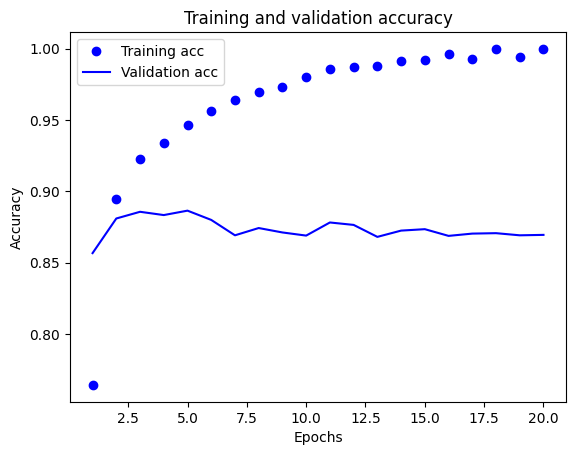

In [74]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9447 - loss: 0.2233
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9658 - loss: 0.1097
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9712 - loss: 0.0903
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8631 - loss: 0.4189


[0.4141872525215149, 0.8650400042533875]

In [76]:
model_32.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.00788972],
       [0.99997544],
       [0.8386935 ],
       ...,
       [0.04826652],
       [0.00788016],
       [0.75013703]], dtype=float32)

Train the model with 64 units

In [77]:
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6714 - loss: 0.5941 - val_accuracy: 0.8643 - val_loss: 0.3653
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8885 - loss: 0.3094 - val_accuracy: 0.8416 - val_loss: 0.3663
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9148 - loss: 0.2309 - val_accuracy: 0.8829 - val_loss: 0.2879
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9394 - loss: 0.1717 - val_accuracy: 0.8881 - val_loss: 0.2762
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9474 - loss: 0.1478 - val_accuracy: 0.8861 - val_loss: 0.2882
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9582 - loss: 0.1230 - val_accuracy: 0.8849 - val_loss: 0.3112
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9623 - loss: 0.1082 - val_accuracy: 0.8676 - val_loss: 0.4014
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9712 - loss: 0.0853 - val_accuracy: 0.8628 -

In [78]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

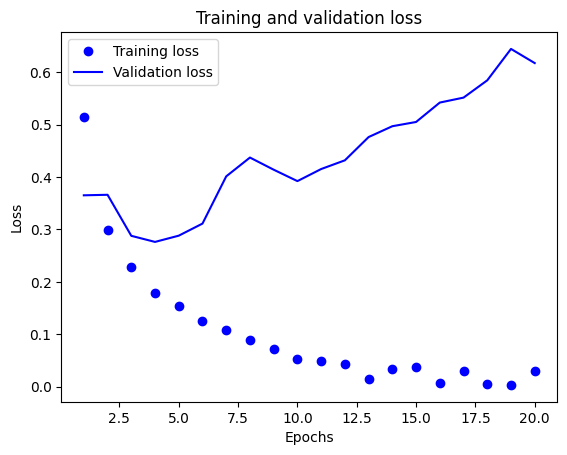

In [79]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

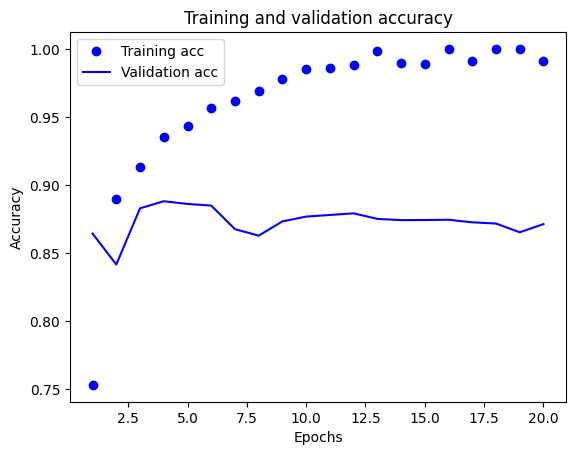

In [80]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9469 - loss: 0.2041
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9684 - loss: 0.0988
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9821 - loss: 0.0629
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8642 - loss: 0.4265


[0.4286160171031952, 0.8664000034332275]

In [82]:
model_64.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01675977],
       [0.99999887],
       [0.16045609],
       ...,
       [0.03757269],
       [0.0043292 ],
       [0.8894998 ]], dtype=float32)

Training the model with 128 units

In [83]:
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.6712 - loss: 0.6056 - val_accuracy: 0.8453 - val_loss: 0.3690
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.8863 - loss: 0.2968 - val_accuracy: 0.8599 - val_loss: 0.3343
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9147 - loss: 0.2249 - val_accuracy: 0.8826 - val_loss: 0.2830
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9349 - loss: 0.1756 - val_accuracy: 0.8898 - val_loss: 0.2813
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9535 - loss: 0.1333 - val_accuracy: 0.8821 - val_loss: 0.3110
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9606 - loss: 0.1141 - val_accuracy: 0.8844 - val_loss: 0.3061
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9743 - loss: 0.0813 - val_accuracy: 0.8554 - val_loss: 0.3837
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9811 - loss: 0.0664 - val_accuracy: 0.8810 

In [84]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

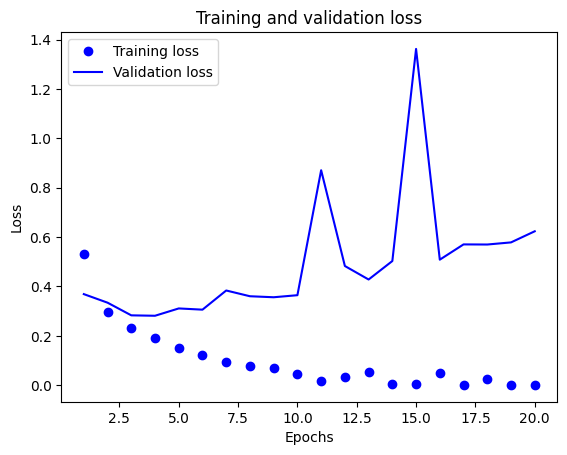

In [85]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

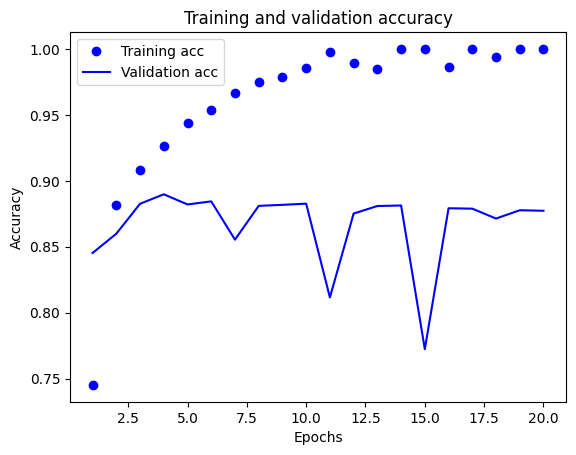

In [86]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [87]:
history_128 = model_128.fit(x_train, y_train, epochs=2, batch_size=512)
results_128 = model_128.evaluate(x_test, y_test)
results_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9352 - loss: 0.2376
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9728 - loss: 0.0866
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8732 - loss: 0.3554


[0.3520098328590393, 0.8756399750709534]

In [88]:
model_128.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.01192801],
       [0.99999964],
       [0.6896397 ],
       ...,
       [0.01745694],
       [0.0109026 ],
       [0.8295005 ]], dtype=float32)

MSE Loss Funtion

In [89]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.6579 - loss: 0.2220 - val_accuracy: 0.8541 - val_loss: 0.1400
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8782 - loss: 0.1216 - val_accuracy: 0.8790 - val_loss: 0.1053
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9081 - loss: 0.0870 - val_accuracy: 0.8860 - val_loss: 0.0923
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9273 - loss: 0.0677 - val_accuracy: 0.8856 - val_loss: 0.0885
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9347 - loss: 0.0596 - val_accuracy: 0.8870 - val_loss: 0.0857
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9509 - loss: 0.0475 - val_accuracy: 0.8880 - val_loss: 0.0832
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9549 - loss: 0.0429 - val_accuracy: 0.8845 - val_loss: 0.0850
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9611 - loss: 0.0387 - val_accuracy: 0.8814 - v

In [90]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

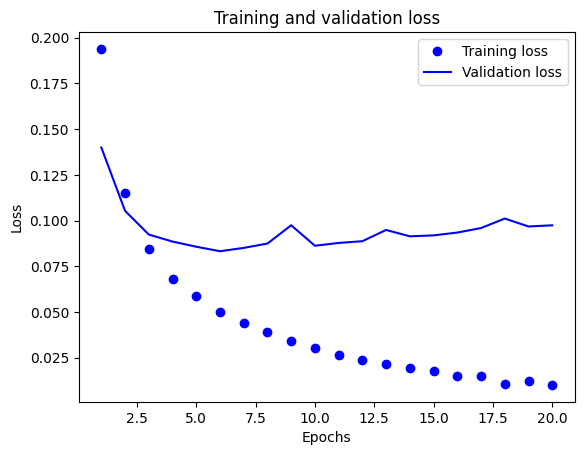

In [91]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

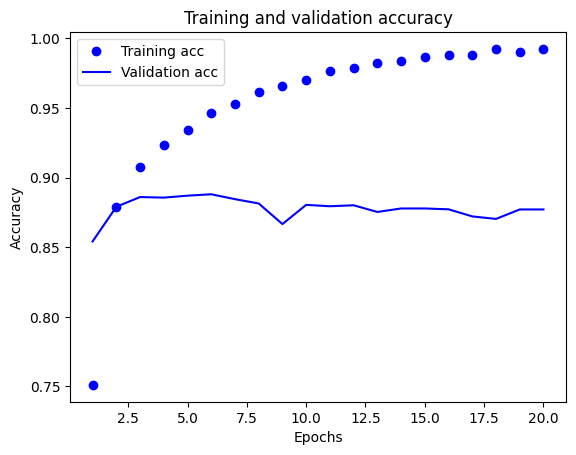

In [92]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [93]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9436 - loss: 0.0455
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9626 - loss: 0.0334
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9702 - loss: 0.0290
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9747 - loss: 0.0260
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9774 - loss: 0.0229
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9799 - loss: 0.0208
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9832 - loss: 0.0182
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9854 - loss: 0.0159
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.1099


[0.10835842043161392, 0.866919994354248]

In [94]:
model_MSE.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.02586799],
       [0.99999994],
       [0.21425945],
       ...,
       [0.04483553],
       [0.01676407],
       [0.27524212]], dtype=float32)

Tanh Activation

In [95]:
model_tanh_activation = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh_activation.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)

history_tanh = model_tanh_activation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7200 - loss: 0.5631 - val_accuracy: 0.8622 - val_loss: 0.3676
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9010 - loss: 0.3062 - val_accuracy: 0.8848 - val_loss: 0.2911
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9326 - loss: 0.2123 - val_accuracy: 0.8854 - val_loss: 0.2709
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9483 - loss: 0.1641 - val_accuracy: 0.8852 - val_loss: 0.2748
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9573 - loss: 0.1305 - val_accuracy: 0.8840 - val_loss: 0.2992
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9673 - loss: 0.1057 - val_accuracy: 0.8775 - val_loss: 0.3382
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9750 - loss: 0.0835 - val_accuracy: 0.8756 - val_loss: 0.3707
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9814 - loss: 0.0661 - val_accuracy: 0.8657 - v

In [96]:
history_dict_tanh_activation = history_tanh.history
history_dict_tanh_activation.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

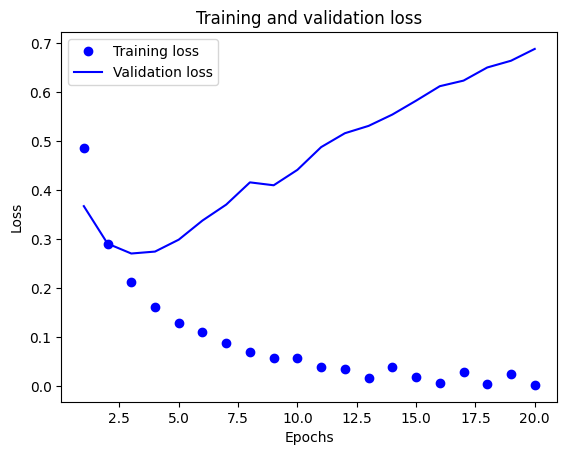

In [97]:
loss_values = history_dict_tanh_activation["loss"]
val_loss_values = history_dict_tanh_activation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

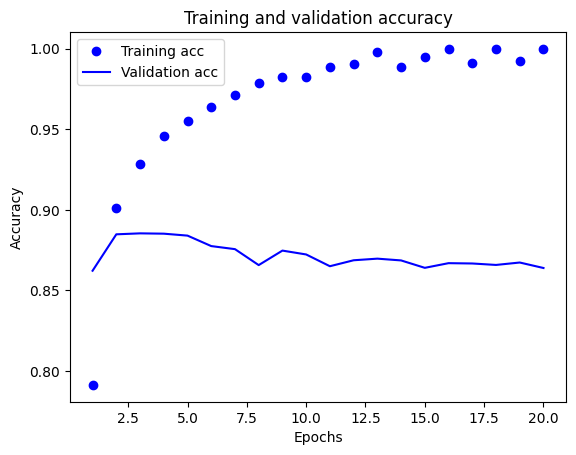

In [98]:
plt.clf()
acc = history_dict_tanh_activation["accuracy"]
val_acc = history_dict_tanh_activation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
model_tanh_activation.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh_activation = model_tanh_activation.evaluate(x_test, y_test)
results_tanh_activation

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9875 - loss: 0.0462
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9876 - loss: 0.0418
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9896 - loss: 0.0367
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9934 - loss: 0.0292
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9923 - loss: 0.0306
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9909 - loss: 0.0290
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9932 - loss: 0.0290
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9914 - loss: 0.0322
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8463 - loss: 0.7869


[0.7865836024284363, 0.8475199937820435]

Adam Optimizer

In [101]:
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6113 - loss: 0.6624 - val_accuracy: 0.8246 - val_loss: 0.5379
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8673 - loss: 0.4708 - val_accuracy: 0.8752 - val_loss: 0.3728
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9097 - loss: 0.3013 - val_accuracy: 0.8866 - val_loss: 0.2999
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9369 - loss: 0.2104 - val_accuracy: 0.8888 - val_loss: 0.2792
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9529 - loss: 0.1636 - val_accuracy: 0.8886 - val_loss: 0.2765
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9654 - loss: 0.1274 - val_accuracy: 0.8863 - val_loss: 0.2842
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9755 - loss: 0.1033 - val_accuracy: 0.8841 - val_loss: 0.2986
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9825 - loss: 0.0815 - val_accuracy: 0.8810 - v

In [102]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

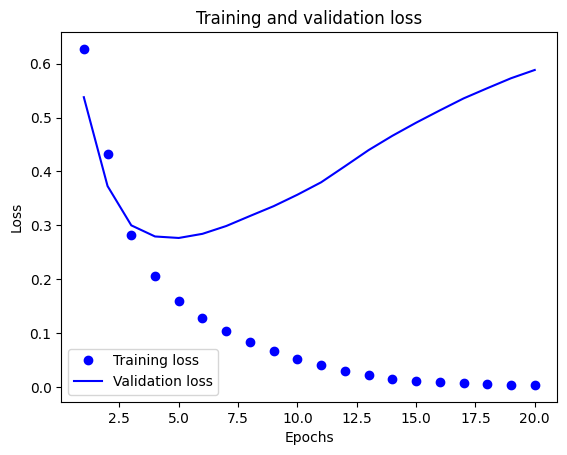

In [103]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

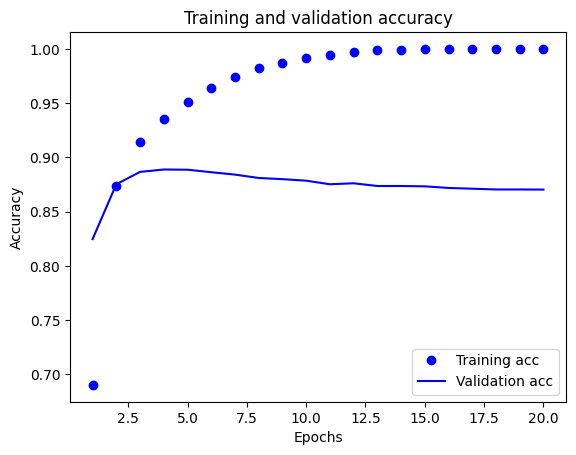

In [104]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [105]:
model_adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = model_adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9473 - loss: 0.2077
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9745 - loss: 0.0881
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9865 - loss: 0.0572
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9916 - loss: 0.0428
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.4875


[0.48194965720176697, 0.8612800240516663]

Regularization

In [107]:
from tensorflow.keras import regularizers
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6858 - loss: 0.6575 - val_accuracy: 0.8595 - val_loss: 0.4587
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8888 - loss: 0.4074 - val_accuracy: 0.8820 - val_loss: 0.3733
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9140 - loss: 0.3126 - val_accuracy: 0.8721 - val_loss: 0.3650
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9309 - loss: 0.2669 - val_accuracy: 0.8891 - val_loss: 0.3344
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9345 - loss: 0.2470 - val_accuracy: 0.8801 - val_loss: 0.3462
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9473 - loss: 0.2222 - val_accuracy: 0.8815 - val_loss: 0.3546
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9562 - loss: 0.2054 - val_accuracy: 0.8835 - val_loss: 0.3429
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9574 - loss: 0.1971 - val_accuracy: 0.8848 - v

In [108]:
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

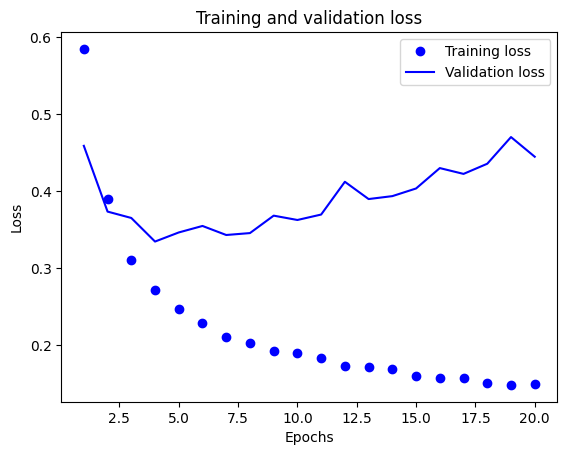

In [109]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

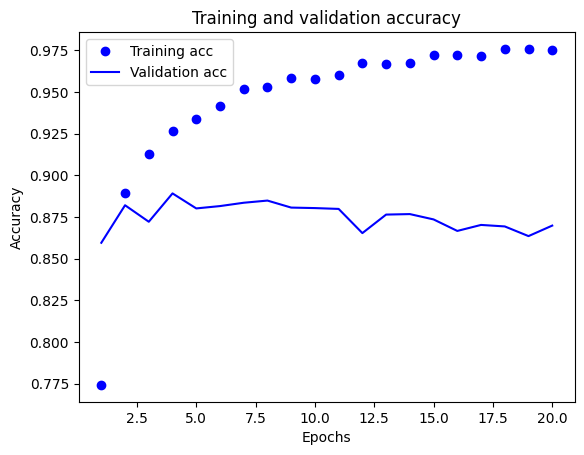

In [110]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [111]:
model_regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9365 - loss: 0.2566
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9468 - loss: 0.2147
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9535 - loss: 0.1988
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9551 - loss: 0.1913
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9604 - loss: 0.1780
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9592 - loss: 0.1773
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9604 - loss: 0.1736
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9643 - loss: 0.1654
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8507 - loss: 0.4666


[0.46651214361190796, 0.8511999845504761]

Dropout

In [113]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5876 - loss: 0.6607 - val_accuracy: 0.8376 - val_loss: 0.5032
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7423 - loss: 0.5243 - val_accuracy: 0.8704 - val_loss: 0.3941
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8119 - loss: 0.4331 - val_accuracy: 0.8806 - val_loss: 0.3343
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8485 - loss: 0.3746 - val_accuracy: 0.8573 - val_loss: 0.3419
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8792 - loss: 0.3170 - val_accuracy: 0.8690 - val_loss: 0.3146
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8913 - loss: 0.2873 - val_accuracy: 0.8756 - val_loss: 0.3032
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9095 - loss: 0.2587 - val_accuracy: 0.8895 - val_loss: 0.2751
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9272 - loss: 0.2209 - val_accuracy: 0.8888 - v

In [114]:
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

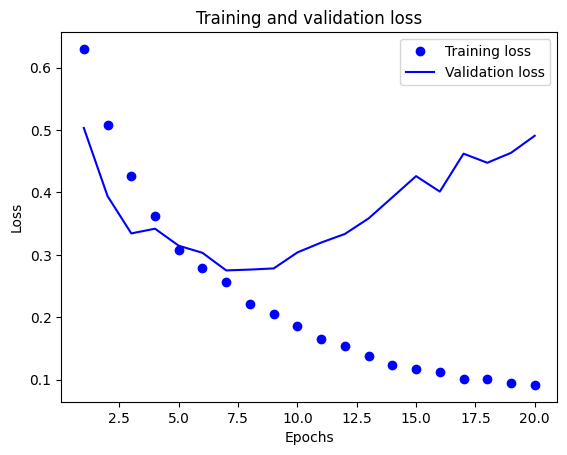

In [115]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

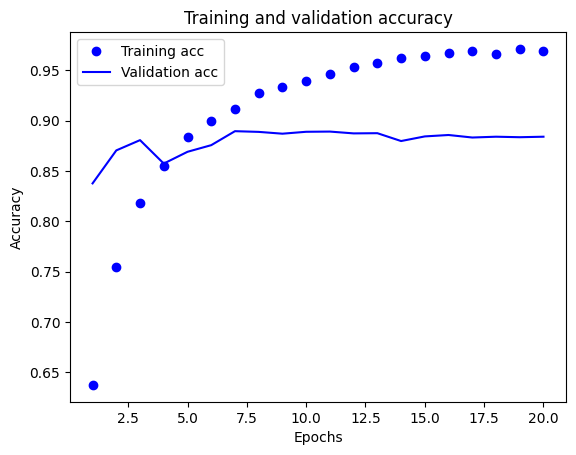

In [116]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [117]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9247 - loss: 0.2686
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9318 - loss: 0.2195
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9425 - loss: 0.1879
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9446 - loss: 0.1751
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9501 - loss: 0.1554
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9515 - loss: 0.1525
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9544 - loss: 0.1412
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9568 - loss: 0.1319
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8667 - loss: 0.4806


[0.4662429690361023, 0.870199978351593]

Train the model with hyper tune parameters

In [118]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5352 - loss: 0.2596 - val_accuracy: 0.7875 - val_loss: 0.2222
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7229 - loss: 0.2179 - val_accuracy: 0.8520 - val_loss: 0.1698
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8296 - loss: 0.1754 - val_accuracy: 0.8720 - val_loss: 0.1391
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8698 - loss: 0.1436 - val_accuracy: 0.8803 - val_loss: 0.1209
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8912 - loss: 0.1217 - val_accuracy: 0.8826 - val_loss: 0.1093
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9136 - loss: 0.0999 - val_accuracy: 0.8665 - val_loss: 0.1102
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9247 - loss: 0.0863 - val_accuracy: 0.8873 - val_loss: 0.1005
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9375 - loss: 0.0746 - val_accuracy: 0.8754 - v

In [119]:
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

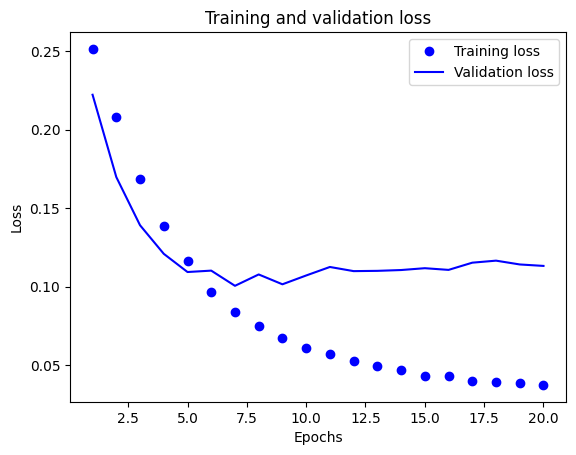

In [120]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

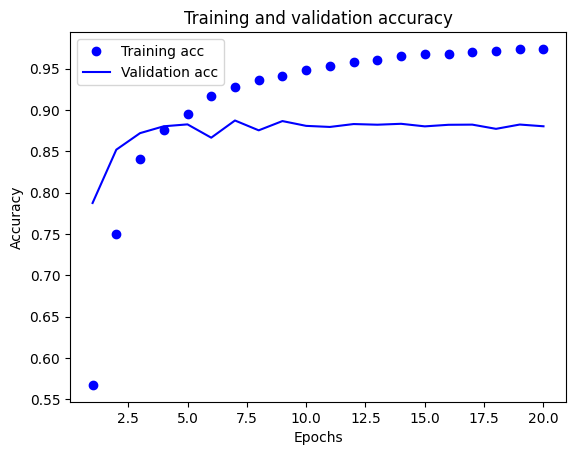

In [121]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [122]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9282 - loss: 0.0744
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9386 - loss: 0.0662
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9454 - loss: 0.0596
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9508 - loss: 0.0554
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9570 - loss: 0.0507
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9558 - loss: 0.0512
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9593 - loss: 0.0480
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9624 - loss: 0.0458
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8751 - loss: 0.1160


[0.11412396281957626, 0.879040002822876]

Summary

In [124]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh_activation[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh_activation[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh_activation']
plt.clf()

<Figure size 640x480 with 0 Axes>

Compiling

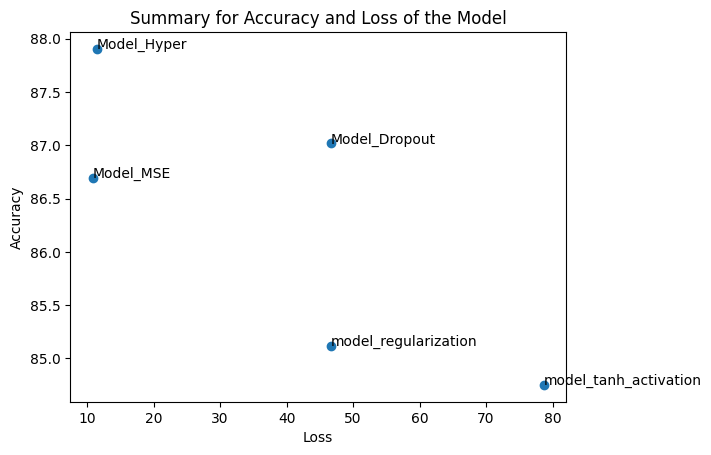

In [125]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()